## Cadenas de Markov de tiempo discreto

### Introducción

Veamos un ejemplo sencillo para empezar.

Cuando CJ está triste, lo que no es muy habitual: o sale a correr, o se zampa un helado o se echa una siesta. Por los datos históricos, si pasó durmiendo un día triste, al día siguiente hay un 60% de probabilidades de que salga a correr, un 20% de que se quede en la cama y un 20% de que se coma un helado. Cuando está triste y sale a correr, hay un 60% de probabilidades de que salga a correr al día siguiente, un 30% de que se atiborre de helado y sólo un 10% de probabilidades de que pase durmiendo al día siguiente. Por último, cuando se da un capricho con un helado en un día triste, sólo hay un 10% de probabilidades de que siga comiendo helado al día siguiente también, un 70% de probabilidades de que salga a correr y un 20% de probabilidades de que pase durmiendo al día siguiente.

![](imagen5-1.png)

La cadena de Markov representada en el diagrama de estados tiene 3 estados posibles: dormir, correr, helado. Por tanto, la matriz de transición será una matriz de 3 x 3. Observa que las flechas que salen de un estado siempre suman exactamente 1, del mismo modo que las entradas de cada fila de la matriz de transición deben sumar exactamente 1, lo que representa la distribución de probabilidad. En la matriz de transición, las celdas hacen la misma función que las flechas en el diagrama de estados.

In [3]:
from scipy.stats import expon
from scipy.integrate import quad
from scipy.integrate import dblquad
import numpy as np
import random as rm

states = ["Sleep","Icecream","Run"]

# Possible sequences of events
transitionName = [["SS","SR","SI"],["RS","RR","RI"],["IS","IR","II"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]


if sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[1]) != 3:
    print("Hay algo erróneo, la matriz de transición")
else: print("Todo está correcto, puedes seguir a otro estado")



Todo está correcto, puedes seguir a otro estado


In [4]:
def activity_forecast(days):
    # Choose the starting state
    activityToday = "Sleep"
    print("Estado de inicio: " + activityToday)
    activityList = [activityToday]
    i = 0
    # Calculo de la probabilidad
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1  
    print("Estados Posibles: " + str(activityList))
    print("Fin de estado después de "+ str(days) + " dias: " + activityToday)
    print("Probabilidad de la posible secuencia de estados: " + str(prob))

# Función que predice el posible estado para los siguientes dos 2 días
activity_forecast(2)

Estado de inicio: Sleep
Estados Posibles: ['Sleep', 'Run', 'Icecream']
Fin de estado después de 2 dias: Icecream
Probabilidad de la posible secuencia de estados: 0.18


## Ejemplo

Modelizaremos el comportamiento de un coche, utilizando una matriz de transición y probabilidades de partida. La matriz define las probabilidades de transición entre diferentes estados, incluyendo la aceleración, el mantenimiento de una velocidad constante, el ralentí y el frenado.

![](imagen5-2.png)

In [5]:
import random

# Definimos una matriz de transición para la cadena de Markov
transition_matrix = {
    'accelerate': {'accelerate': 0.3, 'constant speed': 0.2, 'idling': 0 , 'break': 0.5 },
    'constant speed': {'accelerate': 0.1, 'constant speed': 0.4, 'idling': 0 , 'break': 0.5 },
    'idling': {'accelerate': 0.8, 'constant speed': 0, 'idling': 0.2 , 'break': 0 },
    'break': {'accelerate': 0.4, 'constant speed': 0.05, 'idling': 0.5 , 'break': 0.05 },
}

# Definimos las probabilidades iniciales para cada estado
starting_probabilities = {'accelerate': 0, 'constant speed': 0, 'idling': 0, 'break': 1}

# Seleccionamos aleatoriamente el estado inciaial basado en las probabilitdades iniciales
current_state = random.choices(
    population=list(starting_probabilities.keys()),
    weights=list(starting_probabilities.values())
)[0]

# Generamos una secuencia de estados utilizando la matriz de transicion
num_iterations = 10
for i in range(num_iterations):
    print(current_state)
    next_state = random.choices(
        population=list(transition_matrix[current_state].keys()),
        weights=list(transition_matrix[current_state].values())
    )[0]
    current_state = next_state

break
idling
accelerate
accelerate
accelerate
accelerate
constant speed
break
accelerate
accelerate


### Calculo de estados estacionarios

Cadena de Markov para predecir la secuencia de Pérdida, Empate, Victoria de un equipo de fútbol.

In [6]:
#definimos los estados

states = {
    -1 : "Loss",
    0 : "Draw",
    1 : "Win"
}
print("Estados posibles", states)

transition = np.array([[0.65, 0.1, 0.25],[0.3,0.5,0.2],[0.35,0.1,0.55]])
print("Matriza de transición:\n",transition)

Estados posibles {-1: 'Loss', 0: 'Draw', 1: 'Win'}
Matriza de transición:
 [[0.65 0.1  0.25]
 [0.3  0.5  0.2 ]
 [0.35 0.1  0.55]]


Vamos a seleccionar una secuencia aleatoria de estados

In [7]:
n = 15
br=0
points = 0
start_state = 0
print(states[start_state], "-->", end=" ")
prev_state = start_state

while n:
    if(prev_state==0):
        points+=1
    elif(prev_state==1):
        points+=3
    curr_state = np.random.choice([-1,0,1], p =transition[prev_state+1])
    print(states[curr_state], "-->", end=" ")
    prev_state=curr_state
    n-=1
    br+=1
print("stop")
if(prev_state==0):
        points+=1
elif(prev_state==1):
        points+=3
print("Equipo A: ", points)
print("Porcentaje sobre puntos posibles: ", (points)/(3*br))

Draw --> Draw --> Draw --> Win --> Loss --> Draw --> Win --> Win --> Win --> Draw --> Draw --> Draw --> Loss --> Win --> Loss --> Loss --> stop
Equipo A:  22
Porcentaje sobre puntos posibles:  0.4888888888888889


Vamos a calcular potencias de la mtriz de transición

In [8]:
steps = 15
transition_n = transition
for i in range(steps):
    transition_n=np.matmul(transition_n,transition)

print("La potencia",steps, "de la matriz de transición\n ", transition, "\n es: \n",transition_n)

La potencia 15 de la matriz de transición
  [[0.65 0.1  0.25]
 [0.3  0.5  0.2 ]
 [0.35 0.1  0.55]] 
 es: 
 [[0.48809528 0.1666666  0.34523813]
 [0.48809506 0.16666702 0.34523792]
 [0.48809527 0.1666666  0.34523813]]


Veamos ahora utilizando valores y vectores propios

In [9]:
import scipy.linalg
values, left = scipy.linalg.eig(transition, right = False, left = True)
print("left eigen vectors =\n", left, "\n")
print("eigen values = \n", values)

left eigen vectors =
 [[-7.86428295e-01 -7.07106781e-01  4.08248290e-01]
 [-2.68536491e-01  9.24158116e-16 -8.16496581e-01]
 [-5.56254160e-01  7.07106781e-01  4.08248290e-01]] 

eigen values = 
 [1. +0.j 0.3+0.j 0.4+0.j]


Normalizando

In [11]:
pi = left[:,0]
pi_normalized = [(x/np.sum(pi)).real for x in pi]
print("P normalizada = ", pi_normalized)

P normalizada =  [0.4880952380952384, 0.16666666666666652, 0.3452380952380952]


In [12]:
steps = 10**6
start_state = 0
pi = transition[start_state+1]
print("pi",pi)
print("transitio matrix:\n",transition)
for i in range(steps):
    pi=np.dot(pi,transition)

print("P = ",pi)

pi [0.3 0.5 0.2]
transitio matrix:
 [[0.65 0.1  0.25]
 [0.3  0.5  0.2 ]
 [0.35 0.1  0.55]]
P =  [0.48809524 0.16666667 0.3452381 ]


### Ejemplo

Dada la matriza de transicion
$$ \begin{equation}
\begin{pmatrix}
0.2 & 0.7 & 0.1\\
0.9 & 0 & 0.1\\
0.2 & 0.8 & 0
\end{pmatrix}
\end{equation}
$$

Y el vector de población inicial $[1, 0, 0]$ vamos a calcular la distribucion de probabilídades estacionaria.

[[0.2 0.7 0.1]]
[[0.69 0.22 0.09]]
[[0.354 0.555 0.091]]
[[0.5885 0.3206 0.0909]]
[[0.42442 0.48467 0.09091]]
[[0.539269 0.369822 0.090909]]
[[0.4588754 0.4502155 0.0909091]]
[[0.51515085 0.39394006 0.09090909]]
[[0.47575804 0.43333287 0.09090909]]
[[0.50333301 0.4057579  0.09090909]]
[[0.48403053 0.42506038 0.09090909]]
[[0.49754226 0.41154864 0.09090909]]
[[0.48808405 0.42100686 0.09090909]]
[[0.4947048  0.41438611 0.09090909]]
[[0.49007028 0.41902063 0.09090909]]
[[0.49331444 0.41577647 0.09090909]]
[[0.49104353 0.41804738 0.09090909]]
[[0.49263317 0.41645774 0.09090909]]
[[0.49152042 0.41757049 0.09090909]]
[[0.49229934 0.41679157 0.09090909]]
[[0.4917541  0.41733681 0.09090909]]
[[0.49213577 0.41695514 0.09090909]]
[[0.4918686  0.41722231 0.09090909]]
[[0.49205562 0.41703529 0.09090909]]
[[0.4919247  0.41716621 0.09090909]]
[[0.49201634 0.41707457 0.09090909]]
[[0.4919522  0.41713871 0.09090909]]
[[0.4919971  0.41709381 0.09090909]]
[[0.49196567 0.41712524 0.09090909]]
[[0.4919876

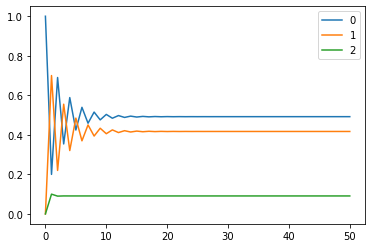

In [13]:
import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt

P = np.array([[0.2, 0.7, 0.1],
              [0.9, 0.0, 0.1],
              [0.2, 0.8, 0.0]])

state=np.array([[1.0, 0.0, 0.0]])

stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0]]

for x in range(50):
    state=np.dot(state,P)
    print(state)
    stateHist=np.append(stateHist,state,axis=0)

dfDistrHist = pd.DataFrame(stateHist)

dfDistrHist.plot()
plt.show()


### Diagramas de estados

Primeramente, copia los archivos src/node.py y src/markovchain.py en tu directorio de trabajo.

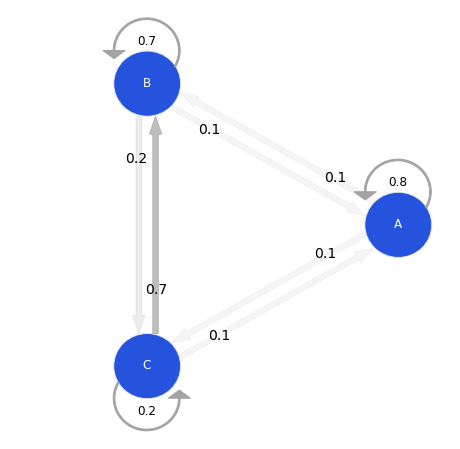

In [14]:
from markovchain import MarkovChain

# Creación de cadena de Markov de tres estados
P = np.array([
    [0.8, 0.1, 0.1],
    [0.1, 0.7, 0.2],
    [0.1, 0.7, 0.2],
])
mc = MarkovChain(P, ['A', 'B', 'C'])
mc.draw()

## Ejercicios

1. Una urna contiene dos bolas sin pintar. Se selecciona una bola al azar y se lanza una moneda. Si la bola elegida no está pintada y la moneda produce cara, pintamos la bola de rojo; si la moneda produce cruz, la pintamos de negro. Si la bola ya está pintada, entonces cambiamos el color de la bola de rojo a negro o de negro a rojo, independientemente de si la moneda produce cara o cruz. Modela el problema como una cadena de Markov y encuentre la matriz de probabilidades de transición.

2. El ascensor de un edificio con bajo y dos pisos realiza viajes de uno a otro piso. El piso en el que finaliza el viaje n-ésimo del ascensor sigue una cadena de Markov. Se sabe que la mitad de los viajes que parten del bajo se dirigen a cada uno de los otros dos pisos, mientras que si un viaje comienza en el primer piso, sólo el 25% de las veces finaliza en el segundo. Por último, si un trayecto
comienza en el segundo piso, siempre finaliza en el bajo. Se pide: a) Calcular la matriz de probabilidades de transición de la cadena; b) Dibujar el gráfico asociado; c) ¿Cuál es la probabilidad de que, a largo plazo, el ascensor se encuentre en cada uno de los tres pisos.

3. Hay tres empresas que venden conexión a Internet basada en fibra a los hogares de los clientes. Estas empresas llevan aquí bastante tiempo y los clientes también cambian de empresa según los siguientes datos: 1) El 10% de los clientes de Hathway cambiarán a ADN y el 10% a Excitel. 2) El 20% de los clientes de ADN se cambiarán a Hathway y el 20% a Excitel. 3) El 10% de los clientes de Excitel se pasarán a Hathway y el 20% a ADN. Dibija el diagrama de transición asociado y averigua el porcentaje de fidelidad que los clientes mantendrán con cada una de las empresas.
   
4. Hay tres empresas que venden software antivirus: Mcaffe, Quickheal y Kaspersky. A estas tres empresas les iba muy bien, pero una nueva empresa, Avira, entra en el mercado y diseña e implementa estrategias de marketing que demuestran que atraerá a: el 5% de los usuarios de KASPERSKEY, al 2% de la base de clientes de MCAFFE, el 6% de los usuarios de QUICK. Además, KASPERSKEY retiene al 92% de sus clientes, MCAFEE al 94%, QUICK el 90% y la nueva compañia retendrá al 97% de sus usuarios. Basándonos en esto, dibuja el diagrama de transición asociado y desarra un modelo para predecir la cuota de mercado.

5. La siguiente matriz de transición de probabilidades se ha tomado de los datos de las agencias de calificación crediticia como Standard & Poor, Moody's y Fitch en los sectores financieros e industriual. Esta matriz, describe las probabilidades de transición de que una determinada empresa, país, etc. permanezca en su estado actual, o pase a un nuevo estado. Basándonos en esto, dibuja el diagrama de treansición y desarra un modelo para predecir la evolución.
a.


In [15]:
P = np.array([[0.9193, 0.0746, 0.0048, 0.0008, 0.0004, 0.0000, 0.0000, 0.0000],
              [0.6400, 0.9181, 0.0676, 0.0060, 0.0006, 0.0012, 0.0003, 0.0000], 
              [0.0700, 0.0227, 0.9169, 0.0512, 0.0056, 0.0025, 0.0001, 0.0004], 
              [0.0400, 0.0270, 0.0556, 0.8788, 0.0483, 0.0102, 0.0017, 0.0024], 
              [0.0400, 0.0010, 0.0061, 0.0775, 0.8148, 0.0790, 0.0111, 0.0101], 
              [0.0000, 0.0010, 0.0028, 0.0046, 0.0695, 0.8280, 0.0396, 0.0545], 
              [0.1900, 0.0000, 0.0037, 0.0075, 0.0243, 0.1213, 0.6045, 0.2369], 
              [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000]])

6. En una comunidad hay 3 supermercados (S1, S2, S3) existe la movilidad de un cliente de uno a otro. El 1 de septiembre, ¼ de los clientes va al S1, 1/3 al S2 y 5/12 al S3 de un total de 10.000 personas. Cada mes el S1 retiene el 90% de sus clientes y pierde el 10% que se va al S2. Se averiguó que el S2 solo retiene el 5% y pierde el 85% que va a S1 y el resto se va a S3, el S3 retiene solo el 40%, pierde el 50% que va al S1 y el 10% va al S2. Calcula: a) La matriz de transición (representala); b) ¿Cuál es la proporción de clientes para los supermercados el 1 de noviembre?; c) Hallar el vector de probabilidad estable.

7. Supongamos una cola para comprar un billete en un mostrador de una línea aerea. Se sabe que: a) En un intervalo de un minuto, hay una probabilidad de 1/3 de que una persona se añada a la cola y una probabilidad de 2/3 de que nadie se agregue. Además, observemos, que en cualquier intervalo de un minuto nunca se agregará más de una persona a la cola. b) Si se está atendiendo a una persona en un intervalo, la probabilidad de que en ese mismo intervalo reciba el billete es de 3/8. Si es así, saldrá de la cola en el siguiente intervalo. c) Todas las probabilidades son independientes de lo que haya sucedido en intervalos anteriores. d) Una persona no puede ser atendida en el mismo intervalo en que llega a la cola. e)  No pueden ser atendidas más de una persona en un mismo intervalo. f) Como media para que no se congestiones la cola, se cerrará si hay 4 personas esperando en ella. Es decir, como mucho, nuestra cola puede tener 4 personas. Calcula La matriz de transición y representala. Hallar el vector de probabilidad estable.